# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [71]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print('human files are:',dog_files)

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [2]:
!wget 'https://thumbs.dreamstime.com/b/many-faces-2754451.jpg'
!ls

--2020-04-29 04:25:21--  https://thumbs.dreamstime.com/b/many-faces-2754451.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.163.122
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.163.122|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117449 (115K) [image/jpeg]
Saving to: ‘many-faces-2754451.jpg.2’

many-faces-2754451. 100%[===================>] 114.70K  --.-KB/s    in 0.02s   

2020-04-29 04:25:21 (5.38 MB/s) - ‘many-faces-2754451.jpg.2’ saved [117449/117449]

1_iter.ipynb	  haarcascades		  many-faces-2754451.jpg.1
dog_app-cn.ipynb  images		  many-faces-2754451.jpg.2
dog_app.ipynb	  many-faces-2754451.jpg  README.md


Number of faces detected: 7


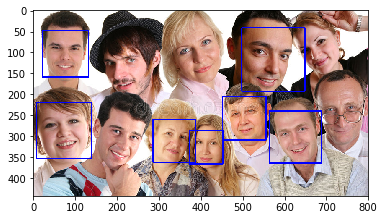

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
# img = cv2.imread(human_files[10])
img = cv2.imread('many-faces-2754451.jpg')
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
The performance of the algorithm is: 98.0 % for human faces 17.0 % for dog faces

In [39]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
human_face_count = 0
dog_face_count = 0

for each in tqdm(zip(human_files_short,dog_files_short)):
    if face_detector(each[0]):
        human_face_count+=1
    if face_detector(each[1]):
        dog_face_count+=1
    
        
print('performance of the algorithm is:',human_face_count/len(human_files_short)*100,'% for human faces',dog_face_count/len(dog_files_short)*100,'% for dog faces')

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.



0it [00:00, ?it/s]
1it [00:00,  3.48it/s]
3it [00:00,  4.46it/s]
4it [00:02,  1.15it/s]
5it [00:02,  1.56it/s]
6it [00:03,  2.05it/s]
7it [00:03,  2.51it/s]
8it [00:03,  2.97it/s]
9it [00:03,  2.67it/s]
10it [00:04,  3.24it/s]
100it [00:32,  3.12it/s]

performance of the algorithm is: 98.0 % for human faces 17.0 % for dog faces


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [40]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [34]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:12<00:00, 43681442.43it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms

def convert_to_tensor(img_path):
    img = Image.open(img_path).convert('RGB')
#     print('the shape of the opened image is:',type(img),img.size)
    
    trans = transforms.Compose([transforms.Resize(size=224),
                                transforms.CenterCrop((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
    
    trans_image = trans(img)[:3,:,:].unsqueeze(0)
#     print('the shape of the img: ',trans_image.shape)
    
    return trans_image

# test_tensor = convert_to_tensor('images/Brittany_02625.jpg')

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    tensor_img = convert_to_tensor(img_path) #image is converted to tensor, the pre-processing happens here
    if use_cuda:
        tensor_img = tensor_img.cuda()
        
    out = VGG16(tensor_img) #this will be class probabilities
    _, pred = torch.max(out, 1)
    
#     print('the preds are: ',torch.max(out,1),'other: ',torch.max(out),'len:',np.argmax(out.detach().numpy()))
    
#     pred = np.argmax(out.detach().numpy())
    
    
    if use_cuda:
        pred = np.squeeze(pred.detach().cpu().numpy())
    else:
        pred = np.squeeze(pred.cpu().numpy())
        
    
    return int(pred) # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [43]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path,name):
    ## TODO: Complete the function
    prediction = VGG16_predict(img_path)
    print('the prediction for',name,'is: ',(prediction >=151) & (prediction <=268),prediction)
    return ((prediction >=151) & (prediction <=268))

# dog_detector('images/Brittany_02625.jpg')

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
The performance of the algorithm is: 1.0 % for human images and  100.0 % for dog images

In [47]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

error = 0
dog_face_count = 0
false_positives = []

for each in tqdm(zip(human_files_short,dog_files_short)):
    if dog_detector(each[0],'human'):
        error+=1
        false_positives.append(each[0])
    if dog_detector(each[1],'dog'):
        dog_face_count+=1
    
        
print('performance of the algorithm is:',error/len(human_files_short)*100,'% for human images and ',dog_face_count/len(dog_files_short)*100,'% for dog images')



1it [00:00,  9.69it/s]

the prediction for human is:  False 906
the prediction for dog is:  True 243
the prediction for human is:  False 456
the prediction for dog is:  True 243
the prediction for human is:  False 400


3it [00:00, 10.21it/s]

the prediction for dog is:  True 243
the prediction for human is:  False 906


6it [00:00,  8.47it/s]

the prediction for dog is:  True 243
the prediction for human is:  False 981
the prediction for dog is:  True 243
the prediction for human is:  False 432
the prediction for dog is:  True 243
the prediction for human is:  False 834


8it [00:00,  9.43it/s]

the prediction for dog is:  True 243
the prediction for human is:  False 906
the prediction for dog is:  True 243
the prediction for human is:  False 834
the prediction for dog is:  True 243


12it [00:01, 10.95it/s]

the prediction for human is:  False 906
the prediction for dog is:  True 243
the prediction for human is:  False 834
the prediction for dog is:  True 243
the prediction for human is:  False 906
the prediction for dog is:  True 243


14it [00:01, 11.71it/s]

the prediction for human is:  False 432
the prediction for dog is:  True 243
the prediction for human is:  False 617
the prediction for dog is:  True 243
the prediction for human is:  False 819
the prediction for dog is:  True 243


18it [00:01, 12.80it/s]

the prediction for human is:  False 457
the prediction for dog is:  True 243
the prediction for human is:  False 739
the prediction for dog is:  True 243
the prediction for human is:  False 823
the prediction for dog is:  True 243


20it [00:01, 13.22it/s]

the prediction for human is:  False 917
the prediction for dog is:  True 243
the prediction for human is:  False 906
the prediction for dog is:  True 243
the prediction for human is:  False 689
the prediction for dog is:  True 243


24it [00:01, 13.49it/s]

the prediction for human is:  False 683
the prediction for dog is:  True 243
the prediction for human is:  False 503
the prediction for dog is:  True 246
the prediction for human is:  False 702
the prediction for dog is:  True 243


26it [00:02, 13.62it/s]

the prediction for human is:  False 617
the prediction for dog is:  True 163
the prediction for human is:  False 834
the prediction for dog is:  True 243
the prediction for human is:  False 834


28it [00:02, 12.35it/s]

the prediction for dog is:  True 243
the prediction for human is:  False 917
the prediction for dog is:  True 243
the prediction for human is:  False 834
the prediction for dog is:  True 243
the prediction for human is:  False 834


32it [00:02, 13.28it/s]

the prediction for dog is:  True 246
the prediction for human is:  False 862
the prediction for dog is:  True 243
the prediction for human is:  False 683
the prediction for dog is:  True 243
the prediction for human is:  False 906


34it [00:02, 13.50it/s]

the prediction for dog is:  True 243
the prediction for human is:  False 819
the prediction for dog is:  True 243
the prediction for human is:  False 906
the prediction for dog is:  True 243


36it [00:02, 12.65it/s]

the prediction for human is:  False 906
the prediction for dog is:  True 243
the prediction for human is:  False 834
the prediction for dog is:  True 243


40it [00:03, 12.28it/s]

the prediction for human is:  False 834
the prediction for dog is:  True 243
the prediction for human is:  False 841
the prediction for dog is:  True 243
the prediction for human is:  False 906
the prediction for dog is:  True 209


42it [00:03, 11.80it/s]

the prediction for human is:  False 459
the prediction for dog is:  True 246
the prediction for human is:  False 459
the prediction for dog is:  True 243
the prediction for human is:  False 678


44it [00:03, 12.11it/s]

the prediction for dog is:  True 243
the prediction for human is:  False 834
the prediction for dog is:  True 243
the prediction for human is:  False 638
the prediction for dog is:  True 243
the prediction for human is:  False 639


48it [00:03, 13.01it/s]

the prediction for dog is:  True 243
the prediction for human is:  False 903
the prediction for dog is:  True 243
the prediction for human is:  False 617
the prediction for dog is:  True 243
the prediction for human is:  False 903


50it [00:04, 13.36it/s]

the prediction for dog is:  True 243
the prediction for human is:  False 457
the prediction for dog is:  True 243
the prediction for human is:  False 854
the prediction for dog is:  True 243
the prediction for human is:  False 459


54it [00:04, 13.72it/s]

the prediction for dog is:  True 243
the prediction for human is:  False 903
the prediction for dog is:  True 243
the prediction for human is:  False 678
the prediction for dog is:  True 243
the prediction for human is:  False 834


56it [00:04, 14.10it/s]

the prediction for dog is:  True 243
the prediction for human is:  False 678
the prediction for dog is:  True 243
the prediction for human is:  False 667
the prediction for dog is:  True 243
the prediction for human is:  False 889


58it [00:04, 14.23it/s]

the prediction for dog is:  True 243
the prediction for human is:  False 678
the prediction for dog is:  True 236
the prediction for human is:  False 834


62it [00:04, 12.44it/s]

the prediction for dog is:  True 236
the prediction for human is:  False 834
the prediction for dog is:  True 236
the prediction for human is:  False 834
the prediction for dog is:  True 236
the prediction for human is:  False 906


64it [00:05, 13.10it/s]

the prediction for dog is:  True 236
the prediction for human is:  False 834
the prediction for dog is:  True 236
the prediction for human is:  False 617
the prediction for dog is:  True 236
the prediction for human is:  False 834
the prediction for dog is:  True

68it [00:05, 13.83it/s]

 236
the prediction for human is:  False 389
the prediction for dog is:  True 236
the prediction for human is:  False 433
the prediction for dog is:  True 236
the prediction for human is:  False 642


70it [00:05, 13.99it/s]

the prediction for dog is:  True 236
the prediction for human is:  False 906
the prediction for dog is:  True 236
the prediction for human is:  False 617
the prediction for dog is:  True 236
the prediction for human is:  False 432


74it [00:05, 11.33it/s]

the prediction for dog is:  True 236
the prediction for human is:  False 776
the prediction for dog is:  True 236
the prediction for human is:  False 906
the prediction for dog is:  True 236
the prediction for human is:  False 683


76it [00:06, 11.56it/s]

the prediction for dog is:  True 236
the prediction for human is:  False 917
the prediction for dog is:  True 236
the prediction for human is:  False 906
the prediction for dog is:  True 236
the prediction for human is:  False 400


78it [00:06, 12.11it/s]

the prediction for dog is:  True 236
the prediction for human is:  False 834
the prediction for dog is:  True 236
the prediction for human is:  False 480


82it [00:06, 11.72it/s]

the prediction for dog is:  True 168
the prediction for human is:  False 906
the prediction for dog is:  True 236
the prediction for human is:  False 699
the prediction for dog is:  True 236
the prediction for human is:  False 906


84it [00:06, 12.39it/s]

the prediction for dog is:  True 236
the prediction for human is:  False 906
the prediction for dog is:  True 236
the prediction for human is:  False 834
the prediction for dog is:  True 236


88it [00:07, 12.54it/s]

the prediction for human is:  False 610
the prediction for dog is:  True 236
the prediction for human is:  False 906
the prediction for dog is:  True 236
the prediction for human is:  False 834
the prediction for dog is:  True 236


90it [00:07, 12.37it/s]

the prediction for human is:  True 233
the prediction for dog is:  True 236
the prediction for human is:  False 834
the prediction for dog is:  True 236
the prediction for human is:  False 652


92it [00:07, 13.08it/s]

the prediction for dog is:  True 236
the prediction for human is:  False 906
the prediction for dog is:  True 236
the prediction for human is:  False 819
the prediction for dog is:  True 236
the prediction for human is:  False 667


96it [00:07, 13.79it/s]

the prediction for dog is:  True 236
the prediction for human is:  False 903
the prediction for dog is:  True 236
the prediction for human is:  False 683
the prediction for dog is:  True 236
the prediction for human is:  False 465


100it [00:07, 14.42it/s]

the prediction for dog is:  True 236
the prediction for human is:  False 683
the prediction for dog is:  True 227
the prediction for human is:  False 400
the prediction for dog is:  True 236
the prediction for human is:  False 400
the prediction for dog is:  True 236
performance of the algorithm is: 1.0 % for human images and  100.0 % for dog images


The false positives are:  ['/data/lfw/Perri_Shaw/Perri_Shaw_0001.jpg']


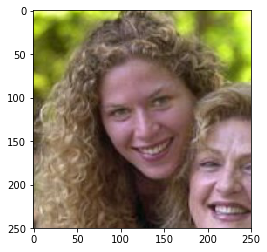

In [48]:
print('The false positives are: ',false_positives)
img = Image.open(false_positives[0])
plt.imshow(img)
plt.show()

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [49]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [19]:
import os
from torchvision import datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

parent_data_dir = '/data/dog_images'

trans = transforms.Compose([transforms.Resize(size=224),
                                transforms.CenterCrop((224,224)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(10),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

trans_test = transforms.Compose([transforms.Resize(size=224),
                                 transforms.CenterCrop((224,224)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])])

train_data = ImageFolder(os.path.join(parent_data_dir,'train/'),trans)
valid_data = ImageFolder(os.path.join(parent_data_dir,'valid/'),trans_test)
test_data = ImageFolder(os.path.join(parent_data_dir,'test/'),trans_test)

# assert as a to keep equal no of classes
assert len(train_data.classes) == len(test_data.classes) == len(valid_data.classes)
batch_size = 16
#creating dataloaders
train_loader = DataLoader(train_data, batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(valid_data,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_data,batch_size=batch_size,shuffle=False) #no need to shuffle for inferencing

loaders_scratch = {}
loaders_scratch['train'] = train_loader
loaders_scratch['test'] = test_loader
loaders_scratch['valid'] = valid_loader

In [20]:
#visualize the data
import matplotlib.pyplot as plt
dataiter = iter(train_loader)
images,labels = dataiter.next()
images = images.numpy()

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image


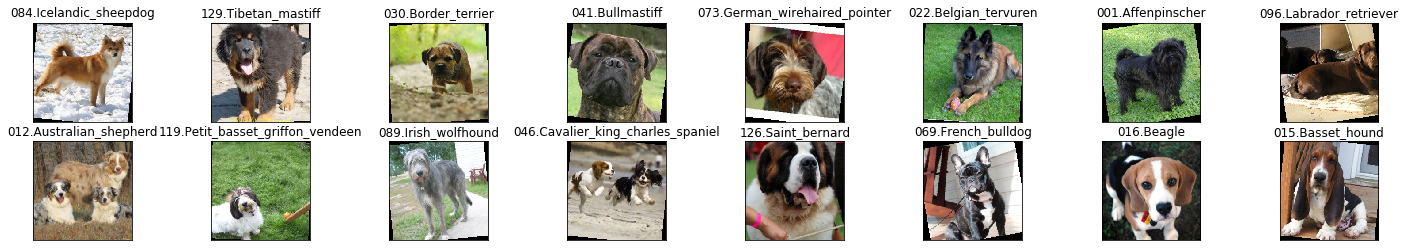

In [21]:
fig = plt.figure(figsize=(25,4))


for idx in np.arange(batch_size):
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])#rows,columns
    imshow(images[idx])
    ax.set_title(train_data.classes[labels[idx]])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
My code uses resize function in transforms class to resize the images to 224. Since the pretrained model takes input of size 224 as per the official documentation.
I have applied augmentation like Centrecrop,RandomHorizontalFlip and Random rotation 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 28 * 28, 500)
        self.fc2 = nn.Linear(500, 133)
        self.dropout = nn.Dropout(0.25)
        self.batch_norm = nn.BatchNorm1d(num_features=500)
        
    
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.batch_norm(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
  (batch_norm): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
The input image size = (224,224,3)
Throughout my architecture I'm using Padding=1,this is done so that the final size of the image remains the same after applying convolution opertaions as the kernel size is (3,3) across layers.
Maxpool2d with kernel=2 and stride=2 is done so as to downsample the image by 2.

While applying the convolutions across layers I'm using out channels in the power of 2 like(16,32,64), this is done since GPU architectures are optimized for data in the powers of 2. So this will help in better parallel processing of data.

The shape of data across layers:
* input = (224,224,3)
* l1 = (112,112,16)
* l2 = (56,56,32)
* l3 = (28,28,64)
* l4 = (28*2*64)
* l5 = (500)
* final_layer = (no of classes = 133)

For drop out and batchnorm chose random values as those help in reducing overfitting.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [15]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr = 0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [16]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    
    valid_loss_min = np.Inf
    
    if os.path.exists(save_path):
        model.load_state_dict(torch.load(save_path))
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for data, target in tqdm(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
#             print('The training loss is:',train_loss)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for data, target in tqdm(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
    
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            
        # calculate average losses
        train_loss = train_loss/len(loaders['train'].dataset)
        valid_loss = valid_loss/len(loaders['valid'].dataset)
        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
             # save model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model
# train the model
model_scratch = train(20, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [13]:
#loading the custom trained model
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [22]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.009066


Test Accuracy: 10% (89/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [23]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch
print('the data loaders are:',loaders_transfer)

the data loaders are: {'train': <torch.utils.data.dataloader.DataLoader object at 0x7fb75d6e4438>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7fb75d6e4630>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7fb75d6e4550>}


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [24]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
print('The list of models are:',dir(models))
model_transfer = models.resnet152(pretrained=True) #choosing resnet152

if use_cuda:
    model_transfer = model_transfer.cuda()

The list of models are: ['AlexNet', 'DenseNet', 'Inception3', 'ResNet', 'SqueezeNet', 'VGG', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'alexnet', 'densenet', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'inception', 'inception_v3', 'resnet', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'squeezenet', 'squeezenet1_0', 'squeezenet1_1', 'vgg', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn', 'vgg19', 'vgg19_bn']


Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:02<00:00, 87008653.69it/s]


In [25]:
print('The resnet model is: ',model_transfer)

The resnet model is:  ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1),

In [27]:
# Freeze parameters so we don't backprop through them
for param in model_transfer.parameters():
    param.requires_grad = False
# Replace the last fully connected layer with a Linnear layer with 133 out features
model_transfer.fc = nn.Linear(2048, 133)
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Since here I'm using pre-trained neural network(Resnet152). This neural network is one the state of the art network where its accuracy is in par with human accuracy.
The only changes done here is changing the last fully connected layer from 1000 to 133 as our dataset consists of 133 classes as opposed to 1000 classes of Imagenet dataset on which the model was trained on.
I think this architecture is suitable for current problem because our dataset is somewhat a subset of the Imagenet dataset so the already trained weights can be suitable here as well.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [28]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [62]:
# train the model
model_transfer = train(20, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer1.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer1.pt'))

100%|██████████| 418/418 [03:39<00:00,  2.23it/s]

100%|██████████| 53/53 [00:25<00:00,  2.82it/s]


Epoch: 1 	Training Loss: 1.834799 	Validation Loss: 0.696947
Validation loss decreased (inf --> 0.696947).  Saving model ...


100%|██████████| 418/418 [03:33<00:00,  2.42it/s]

100%|██████████| 53/53 [00:25<00:00,  2.86it/s]


Epoch: 2 	Training Loss: 0.653921 	Validation Loss: 0.587900
Validation loss decreased (0.696947 --> 0.587900).  Saving model ...


100%|██████████| 418/418 [03:41<00:00,  2.25it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 3 	Training Loss: 0.532580 	Validation Loss: 0.600624



100%|██████████| 418/418 [03:40<00:00,  2.16it/s]

100%|██████████| 53/53 [00:25<00:00,  2.84it/s]


Epoch: 4 	Training Loss: 0.460127 	Validation Loss: 0.498277
Validation loss decreased (0.587900 --> 0.498277).  Saving model ...


100%|██████████| 418/418 [03:38<00:00,  1.87it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 5 	Training Loss: 0.437787 	Validation Loss: 0.633158



100%|██████████| 418/418 [03:34<00:00,  2.45it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 6 	Training Loss: 0.396770 	Validation Loss: 0.592003



100%|██████████| 418/418 [03:40<00:00,  2.19it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 7 	Training Loss: 0.378332 	Validation Loss: 0.576593



100%|██████████| 418/418 [03:41<00:00,  2.20it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 8 	Training Loss: 0.351915 	Validation Loss: 0.534707



100%|██████████| 418/418 [03:38<00:00,  2.17it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 9 	Training Loss: 0.346672 	Validation Loss: 0.537029



100%|██████████| 418/418 [03:33<00:00,  1.92it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 10 	Training Loss: 0.322953 	Validation Loss: 0.622415



100%|██████████| 418/418 [03:40<00:00,  2.06it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 11 	Training Loss: 0.325668 	Validation Loss: 0.566191



100%|██████████| 418/418 [03:42<00:00,  1.91it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 12 	Training Loss: 0.283812 	Validation Loss: 0.557929



100%|██████████| 418/418 [03:40<00:00,  2.37it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 13 	Training Loss: 0.287164 	Validation Loss: 0.612567



100%|██████████| 418/418 [03:33<00:00,  2.25it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 14 	Training Loss: 0.287468 	Validation Loss: 0.814507



100%|██████████| 418/418 [03:40<00:00,  2.35it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 15 	Training Loss: 0.267445 	Validation Loss: 0.633416



100%|██████████| 418/418 [03:39<00:00,  2.27it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 16 	Training Loss: 0.241080 	Validation Loss: 0.674273



100%|██████████| 418/418 [03:37<00:00,  2.21it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 17 	Training Loss: 0.255618 	Validation Loss: 0.584561



100%|██████████| 418/418 [03:33<00:00,  2.34it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 18 	Training Loss: 0.256041 	Validation Loss: 0.778829



100%|██████████| 418/418 [03:39<00:00,  2.35it/s]

  0%|          | 0/418 [00:00<?, ?it/s]

Epoch: 19 	Training Loss: 0.259967 	Validation Loss: 0.667253



100%|██████████| 418/418 [03:39<00:00,  2.36it/s]

100%|██████████| 20/20 [1:21:18<00:00, 243.66s/it]


Epoch: 20 	Training Loss: 0.234418 	Validation Loss: 0.781024


In [29]:
#loading trained model
model_transfer.load_state_dict(torch.load('model_transfer1.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [30]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.560236


Test Accuracy: 81% (683/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [31]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image_tensor = convert_to_tensor(img_path)

    # move model inputs to cuda, if GPU available
    if use_cuda:
        image_tensor = image_tensor.cuda()

    # get sample outputs
    output = model_transfer(image_tensor)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    pred = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())
    
    return class_names[pred]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [32]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def display_image(img_path, title="Title"):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()
    
def dog_detector_1(img_path):
    ## TODO: Complete the function
    prediction = VGG16_predict(img_path)
#     print('the prediction for',name,'is: ',(prediction >=151) & (prediction <=268),prediction)
    return ((prediction >=151) & (prediction <=268))

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if (face_detector(img_path)):
        print("Hello Human!")
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title=f"Predicted:{predicted_breed}")
        
        print("You look like a ...")
        print(predicted_breed.upper())
    # check if image has dogs:
    elif dog_detector_1(img_path):
        print("Hello Doggie!")
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title=f"Predicted:{predicted_breed}")
        
        print("Your breed is most likley ...")
        print(predicted_breed.upper())
    else:
        print("Oh, we're sorry! We couldn't detect any dog or human face in the image.")
        display_image(img_path, title="...")
        print("Try another!")
    print("\n")
    

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__


* Fine tuning the to increase the accuracy
* Instead of singe class,top N class output is more preferred
* Experiment with different architectures and select the best architecture.

In [72]:
#downloading dogs images from internet
!wget https://static01.nyt.com/images/2019/06/17/science/17DOGS/17DOGS-superJumbo.jpg

--2020-05-03 05:41:02--  https://static01.nyt.com/images/2019/06/17/science/17DOGS/17DOGS-superJumbo.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 350990 (343K) [image/jpeg]
Saving to: ‘17DOGS-superJumbo.jpg’

17DOGS-superJumbo.j 100%[===================>] 342.76K  --.-KB/s    in 0.05s   

2020-05-03 05:41:02 (6.49 MB/s) - ‘17DOGS-superJumbo.jpg’ saved [350990/350990]



In [75]:
!wget https://www.guidedogs.org/wp-content/uploads/2019/11/website-donate-mobile.jpg

--2020-05-03 05:42:15--  https://www.guidedogs.org/wp-content/uploads/2019/11/website-donate-mobile.jpg
Resolving www.guidedogs.org (www.guidedogs.org)... 192.138.21.222
Connecting to www.guidedogs.org (www.guidedogs.org)|192.138.21.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47539 (46K) [image/jpeg]
Saving to: ‘website-donate-mobile.jpg’

website-donate-mobi 100%[===================>]  46.42K  --.-KB/s    in 0.03s   

2020-05-03 05:42:15 (1.35 MB/s) - ‘website-donate-mobile.jpg’ saved [47539/47539]



In [76]:
!wget https://ichef.bbci.co.uk/wwfeatures/live/976_549/images/live/p0/7z/n7/p07zn7p7.jpg

--2020-05-03 05:42:36--  https://ichef.bbci.co.uk/wwfeatures/live/976_549/images/live/p0/7z/n7/p07zn7p7.jpg
Resolving ichef.bbci.co.uk (ichef.bbci.co.uk)... 23.4.14.92, 2600:1407:d800:2a6::f33, 2600:1407:d800:2b2::f33
Connecting to ichef.bbci.co.uk (ichef.bbci.co.uk)|23.4.14.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31278 (31K) [image/jpeg]
Saving to: ‘p07zn7p7.jpg’

p07zn7p7.jpg        100%[===================>]  30.54K  --.-KB/s    in 0.01s   

2020-05-03 05:42:36 (2.79 MB/s) - ‘p07zn7p7.jpg’ saved [31278/31278]



Hello Human!


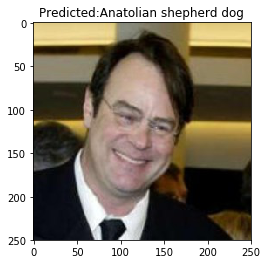

You look like a ...
ANATOLIAN SHEPHERD DOG


Hello Human!


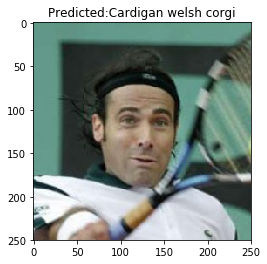

You look like a ...
CARDIGAN WELSH CORGI


Hello Human!


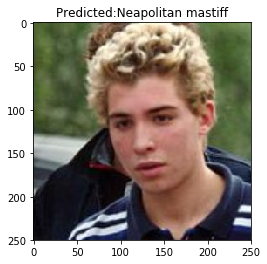

You look like a ...
NEAPOLITAN MASTIFF


Hello Doggie!


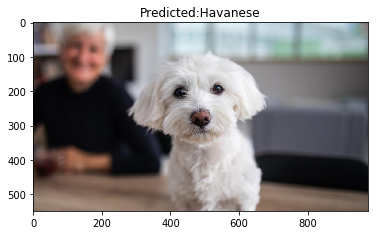

Your breed is most likley ...
HAVANESE


Hello Human!


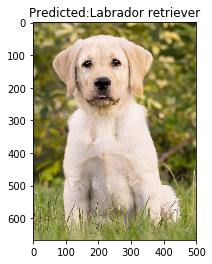

You look like a ...
LABRADOR RETRIEVER


Hello Doggie!


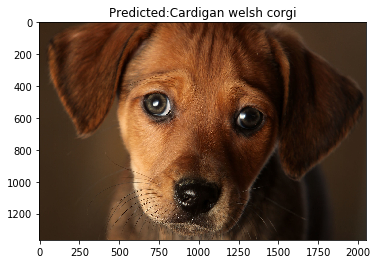

Your breed is most likley ...
CARDIGAN WELSH CORGI




In [77]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
dog_files = ['p07zn7p7.jpg','website-donate-mobile.jpg','17DOGS-superJumbo.jpg']
## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

In [78]:
torch.cuda.get_device_name(0) #get the name of the GPU being used 

'Tesla K80'